In [3]:
import subprocess
def run_command(command):
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    while True:
        output = process.stdout.readline()
        if not output:
            break
        print(output.strip().decode())

In [9]:
import os
dropout_layer = [0.2, 0.3, 0.4]
hidden_dim = [100, 200, 300]
num_layers = [2,3,4,5]
weight_decay = [0,0.01]
learning_rate =[0.01, 0.05]

counter = 1

for dropout in dropout_layer:
    for dim in hidden_dim:
        for layers in num_layers:
            for decay in weight_decay:
                for rate in learning_rate:
                    print(f"Training Model: {counter}---------------------------------------------\n\n\n")
                    if os.path.exists(f"evaluation/GCNLinkPrediction{counter}_eval.json"):
                        print(f"Skipping {counter} as it is already complete-----------------------------\n")
                        print(dropout,dim,layers,decay,rate)
                    else:
                        train_command = f"python train.py --dropout {dropout} --hidden_dim {dim} --num_layers {layers} --weight_decay {decay} --learning_rate {rate} --counter {counter}"
                        predict_command = f"python predict.py --dropout {dropout} --hidden_dim {dim} --num_layers {layers} --weight_decay {decay} --learning_rate {rate} --counter {counter}"

                        # Run train command
                        run_command(train_command)

                        # Run predict command
                        run_command(predict_command)
                    counter += 1

In [22]:
#find the best model
import os
import json
directory = "evaluation/"

files = os.listdir(directory)
json_files = [file for file in files if file.endswith('.json')]

best_model_number = 0
hit_ratio = 0

for json_file in json_files:
    try:
        with open(f"evaluation/{json_file}", "r") as file:
            data = json.load(file)
        if data['hit_ratio'] > hit_ratio:
            hit_ratio = data['hit_ratio']
            best_model_number = data['Hyperparameters']['counter']
    except:
        continue

In [24]:
print(hit_ratio)
print(best_model_number)

0.1777066821784338
5


In [26]:
with open(f"evaluation/GCNLinkPrediction{best_model_number}_eval.json", "r") as file:
    data = json.load(file)
    
print(data)

{'model': 'GCNLinkPrediction5', 'max_test_set_friend_count': 811, 'num_test_set_users': 203702, 'hit_ratio_sample_size': 10000, 'hit_ratio': 0.1777066821784338, 'Hyperparameters': {'dropout': 0.2, 'hidden_dim': 100, 'num_layers': 3, 'weight_decay': 0.0, 'learning_rate': 0.01, 'counter': 5}}


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

data_best = pd.read_csv(f"evaluation/GCNLinkPrediction{best_model_number}_loss.csv")
display(data_best)

,epoch,train_loss,validation_losses,test_loss
0,1,0.733198,0.728930,0.615773
1,2,0.706003,0.689677,0.615773
2,3,0.676891,0.671871,0.615773
3,4,0.663189,0.659513,0.615773
4,5,0.653660,0.643465,0.615773
5,6,0.642285,0.626878,0.615773
6,7,0.630681,0.615870,0.615773


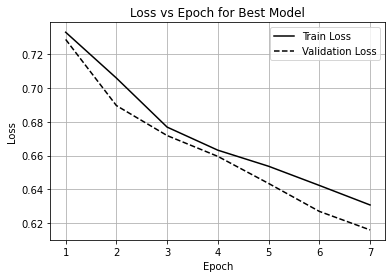

In [34]:
# Plot the data
plt.plot(data_best['epoch'], data_best['train_loss'], color='black', label='Train Loss', linestyle='-')
plt.plot(data_best['epoch'], data_best['validation_losses'], color='black', label='Validation Loss', linestyle='--')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch for Best Model')

# Display the plot
plt.grid(True)
plt.savefig("../Images/Epoch.png")
plt.show()